In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
# Path to the .xvg file
file_path = "Data/1hz3_T310.run.25000000.energy.xvg"

# Step 1: Read the file and filter out comment lines
with open(file_path, 'r') as file:
    lines = file.readlines()

# Filter out lines that start with '#' or '@'
filtered_lines = [line for line in lines if not line.startswith(('#', '@'))]

# Join filtered lines and use Pandas to read the data
from io import StringIO
data = '\n'.join(filtered_lines)

# Load the data into a DataFrame
df = pd.read_csv(StringIO(data), delim_whitespace=True, header=None)

print(df.shape) 

df.columns = ['Time', "Potential", "Kinetic En.", "Total Energy", "Temperature", "Pressure", "Volume"]

print(df['Time'])
# # Display the first few rows of the DataFrame
# print(df.head())

(501, 7)
0          0.0
1        100.0
2        200.0
3        300.0
4        400.0
        ...   
496    49600.0
497    49700.0
498    49800.0
499    49900.0
500    50000.0
Name: Time, Length: 501, dtype: float64


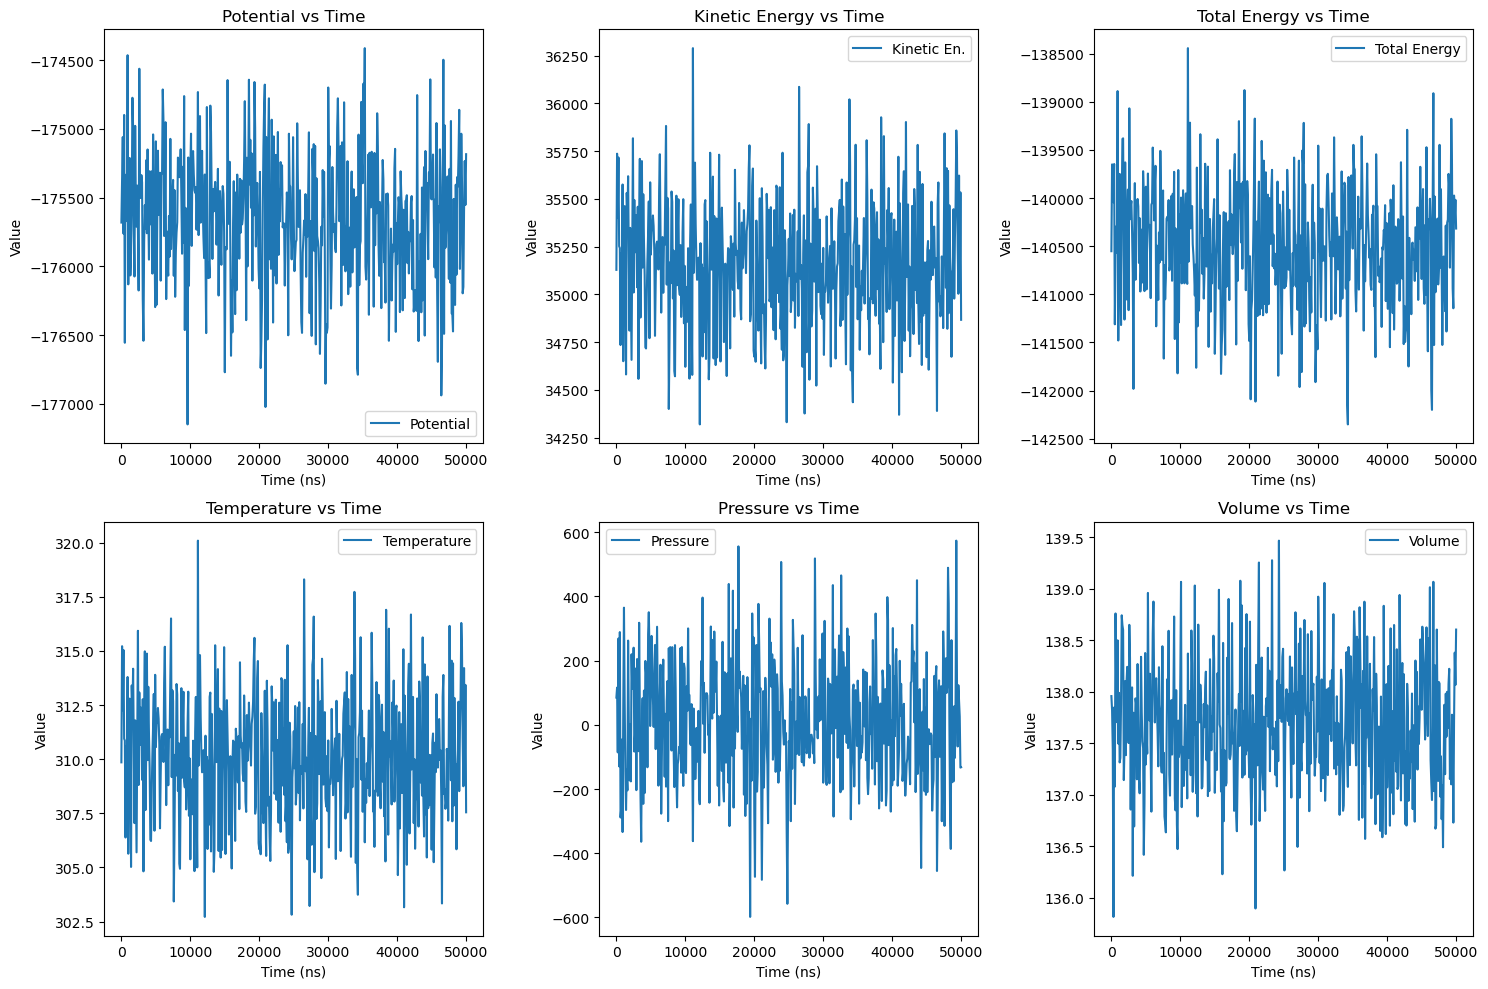

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].plot(df['Time'], df['Potential'], label='Potential')
axs[0, 0].set_title('Potential vs Time')

axs[0, 1].plot(df['Time'], df['Kinetic En.'], label='Kinetic En.')
axs[0, 1].set_title('Kinetic Energy vs Time')

axs[0, 2].plot(df['Time'], df['Total Energy'], label='Total Energy')
axs[0, 2].set_title('Total Energy vs Time')

axs[1, 0].plot(df['Time'], df['Temperature'], label='Temperature')
axs[1, 0].set_title('Temperature vs Time')

axs[1, 1].plot(df['Time'], df['Pressure'], label='Pressure')
axs[1, 1].set_title('Pressure vs Time')

axs[1, 2].plot(df['Time'], df['Volume'], label='Volume')
axs[1, 2].set_title('Volume vs Time')

# Optionally, add legends and adjust layout
for ax in axs.flat:
    ax.legend()
    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('Value')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

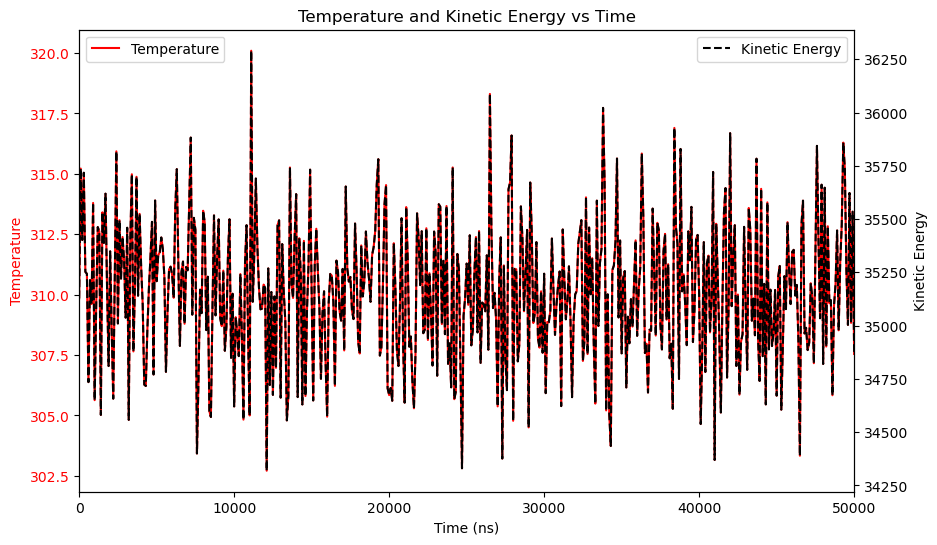

In [14]:
# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Temperature on the left y-axis
ax1.plot(df['Time'], df['Temperature'], color='red', linestyle="-", label='Temperature')
ax1.set_xlabel('Time (ns)')  # X-axis label
ax1.set_ylabel('Temperature', color='red')  # Left y-axis label
ax1.set_xlim(0, 50000)
ax1.tick_params(axis='y', labelcolor='red')  # Set color of the left y-axis
ax1.legend(loc='upper left')

# Create a second y-axis for Kinetic Energy
ax2 = ax1.twinx()  # This creates a twin Axes sharing the x-axis with ax1
ax2.plot(df['Time'], df['Kinetic En.'], color='black', linestyle="--", label='Kinetic Energy')
ax2.set_ylabel('Kinetic Energy', color='black')  # Right y-axis label
ax2.tick_params(axis='y', labelcolor='black')  # Set color of the right y-axis
ax2.legend(loc='upper right')

# Optionally, add a title to the plot
plt.title('Temperature and Kinetic Energy vs Time')

# Show the plot
plt.show()